### Here we import erroneous data generated in MATLAB, normalize them and then feed them to the DNN-SE.

# Import required libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.backend import gradients
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras import regularizers
from sklearn.utils import shuffle
from tensorflow.keras import losses
import h5py
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from time import time 

# # np.random.seed(123)
# # python_random.seed(123)
# # tf.random.set_seed(123)

In [2]:
#Import Training Dataset

x_train = pd.read_csv('x_train.csv', header = None)
y_train = pd.read_csv('y_train.csv', header = None)

#Import Test Dataset
x_test = pd.read_csv('x_test.csv', header = None)
y_test = pd.read_csv('y_test.csv', header = None)


#Convert to numpy
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()


In [8]:
y_train.shape

(10000, 172)

# Normalization Process 

In [9]:
def normalize(x):
    
    x_min = np.amin(x)
    x_max = np.amax(x)
    x_norm = (x-x_min)/(x_max-x_min)
    
    return x_norm,x_min,x_max

In [10]:
#Normalizing Data
x_normalized_train = np.zeros(x_train.shape) 
y_normalized_train = np.zeros(y_train.shape)  
x_normalized_test = np.zeros(x_test.shape)
y_normalized_test = np.zeros(y_test.shape)  


for i in range(x_train.shape[1]):
    t1,x_min,x_max = normalize(x_train[:,i])
    x_normalized_train[:,i] = t1
    x_normalized_test[:,i] = (x_test[:,i]-x_min)/(x_max-x_min)
    

for j in range(y_train.shape[1]):
    t2,y_min,y_max = normalize(y_train[:,j])
    y_normalized_train[:,j] = t2
    y_normalized_test[:,j] = (y_test[:,j]-y_min)/(y_max-y_min)


# x_normalized_test = (x_test-x_min)/(x_max-x_min)
# y_normalized_test = (y_test-y_min)/(y_max-y_min)

In [11]:
main_y_train = y_train
main_x_train = x_train
main_y_test = y_test
main_x_test = x_test

### Data cleaning

In [12]:
max_x_train = np.amax(x_normalized_train)
min_x_train = np.amin(x_normalized_train)
max_x_test = np.amax(x_normalized_test)
min_x_test = np.amin(x_normalized_test)

max_y_train = np.amax(y_normalized_train)
min_y_train = np.amin(y_normalized_train)
max_y_test = np.amax(y_normalized_test)
min_y_test = np.amin(y_normalized_test)

print('max_x_train = ',max_x_train,'\n',
      'min_x_train = ',min_x_train,'\n',
      'max_x_test= ',max_x_test,'\n',
      'min_x_test',min_x_test,'\n',
      'max_y_train = ',max_y_train,'\n',
      'min_y_train = ',min_y_train,'\n',

      'max_y_test= ',max_y_test,'\n',
      'min_y_test',min_y_test,'\n',
     )

max_x_train =  1.0 
 min_x_train =  0.0 
 max_x_test=  1.111410480242685 
 min_x_test -0.1788774246014781 
 max_y_train =  1.0 
 min_y_train =  0.0 
 max_y_test=  1.159312248854177 
 min_y_test -0.14023102784888358 



In [ ]:
y_normalized_train[np.isnan(y_normalized_train)] = 0
y_normalized_test[np.isnan(y_normalized_test)] = 0
x_normalized_train[np.isnan(x_normalized_train)] = 0
x_normalized_test[np.isnan(x_normalized_test)] = 0

In [13]:
# split train and validation 
x_train, x_val, y_train, y_val = train_test_split(x_normalized_train, y_normalized_train, test_size=0.2)

x_test = x_normalized_test
y_test = y_normalized_test

# Build the neural network

Epoch 1/100
249/250 [============================>.] - ETA: 0s - loss: 1.6515 - MSE: 1.6515
Epoch 1: val_loss improved from inf to 0.05614, saving model to weights.best.hdf5
250/250 [==============================] - 4s 10ms/step - loss: 1.6470 - MSE: 1.6470 - val_loss: 0.0561 - val_MSE: 0.0561 - lr: 0.0010
Epoch 2/100
245/250 [============================>.] - ETA: 0s - loss: 0.2412 - MSE: 0.2412
Epoch 2: val_loss improved from 0.05614 to 0.02778, saving model to weights.best.hdf5
250/250 [==============================] - 3s 11ms/step - loss: 0.2384 - MSE: 0.2384 - val_loss: 0.0278 - val_MSE: 0.0278 - lr: 0.0010
Epoch 3/100
249/250 [============================>.] - ETA: 0s - loss: 0.0597 - MSE: 0.0597
Epoch 3: val_loss improved from 0.02778 to 0.02435, saving model to weights.best.hdf5
250/250 [==============================] - 4s 14ms/step - loss: 0.0596 - MSE: 0.0596 - val_loss: 0.0244 - val_MSE: 0.0244 - lr: 0.0010
Epoch 4/100
246/250 [============================>.] - ETA: 0s - 

Epoch 54/100
249/250 [============================>.] - ETA: 0s - loss: 0.0126 - MSE: 0.0126
Epoch 54: val_loss improved from 0.00808 to 0.00797, saving model to weights.best.hdf5
250/250 [==============================] - 4s 15ms/step - loss: 0.0126 - MSE: 0.0126 - val_loss: 0.0080 - val_MSE: 0.0080 - lr: 0.0010
Epoch 55/100
249/250 [============================>.] - ETA: 0s - loss: 0.0127 - MSE: 0.0127
Epoch 55: val_loss improved from 0.00797 to 0.00776, saving model to weights.best.hdf5
250/250 [==============================] - 4s 15ms/step - loss: 0.0127 - MSE: 0.0127 - val_loss: 0.0078 - val_MSE: 0.0078 - lr: 0.0010
Epoch 56/100
249/250 [============================>.] - ETA: 0s - loss: 0.0124 - MSE: 0.0124
Epoch 56: val_loss did not improve from 0.00776
250/250 [==============================] - 4s 15ms/step - loss: 0.0124 - MSE: 0.0124 - val_loss: 0.0078 - val_MSE: 0.0078 - lr: 0.0010
Epoch 57/100
249/250 [============================>.] - ETA: 0s - loss: 0.0124 - MSE: 0.0124
E

Epoch 82/100
249/250 [============================>.] - ETA: 0s - loss: 0.0113 - MSE: 0.0113
Epoch 82: val_loss did not improve from 0.00679
250/250 [==============================] - 4s 14ms/step - loss: 0.0113 - MSE: 0.0113 - val_loss: 0.0069 - val_MSE: 0.0069 - lr: 0.0010
Epoch 83/100
247/250 [============================>.] - ETA: 0s - loss: 0.0113 - MSE: 0.0113
Epoch 83: val_loss did not improve from 0.00679
250/250 [==============================] - 4s 14ms/step - loss: 0.0113 - MSE: 0.0113 - val_loss: 0.0069 - val_MSE: 0.0069 - lr: 0.0010
Epoch 84/100
250/250 [==============================] - ETA: 0s - loss: 0.0113 - MSE: 0.0113
Epoch 84: val_loss did not improve from 0.00679
250/250 [==============================] - 4s 14ms/step - loss: 0.0113 - MSE: 0.0113 - val_loss: 0.0070 - val_MSE: 0.0070 - lr: 0.0010
Epoch 85/100
250/250 [==============================] - ETA: 0s - loss: 0.0113 - MSE: 0.0113
Epoch 85: val_loss improved from 0.00679 to 0.00672, saving model to weights.be

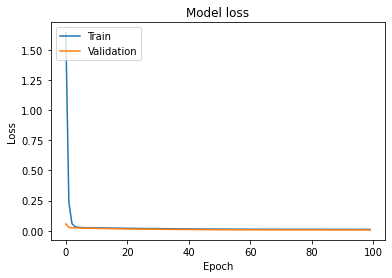

In [14]:
dp = 0.5 # set Dropout rate 
nu = 200 # number of neurons in each layer 
ne = 100 # number of epochs

#################################### Model Architecture #############################################
model = Sequential()

model.add(Dense(nu, activation='relu', input_dim=x_train.shape[1], kernel_initializer='he_normal')) # Hidden 1
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 2
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 3
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 4
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 5
model.add(BatchNormalization())
model.add(Dropout(dp))

# model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 6

# model.add(Dense(300, activation='relu', kernel_initializer='he_normal')) # Hidden 7



model.add(Dense(y_train.shape[1], activation='linear',kernel_initializer='he_normal')) # Output

################################## Model Configuration #####################################

loss_fn = losses.MeanSquaredError() # set loss function 
Adam(learning_rate=0.09456, beta_1=0.9, beta_2=0.999, amsgrad=False) # set configuration of Optimizer
model.compile(loss=loss_fn, optimizer='adam', metrics=['MSE'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=10, min_lr=0.0001)
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath,save_weights_only=True, monitor='val_loss', verbose=1, save_best_only=True, mode='min')



history = model.fit(x_train,y_train,verbose=1,epochs=ne , validation_data = (x_val,y_val),callbacks=[checkpoint,reduce_lr])


    
# plot training history
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


In [15]:
even_index = np.arange(0,y_test.shape[1],2) #Index for magnitudes
odd_index = np.arange(1,y_test.shape[1],2) #Index for angles
odd_index

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171])

In [16]:
# Evaluation
start_SE = time()
pred = model.predict(x_test)
end_SE = time()
elapsed_time = end_SE - start_SE

pred_actual = np.zeros(y_test.shape)

for j in range(main_y_train.shape[1]):
    t2,y_min,y_max = normalize(main_y_train[:,j])
    pred_actual[:,j] = (pred[:,j]*(y_max-y_min))+y_min
    
even_index = np.arange(0,y_test.shape[1],2)
odd_index = np.arange(1,y_test.shape[1],2)

pred_mag_actual = pred_actual[:,even_index]
pred_ang_actual = pred_actual[:,odd_index]*180/np.pi

phase_MAE = mean_absolute_error(pred_actual[:,odd_index], main_y_test[:,odd_index])*180/np.pi
#Formulate MAPE by my own
mag_MAPE = np.sum(abs((main_y_test[:,even_index]-pred_actual[:,even_index])/main_y_test[:,even_index]))/main_y_test[:,even_index].shape[0]/(main_y_test[:,even_index].shape[1])*100
#MAPE using the function (both give the same results)
mag_MAPE2 = mean_absolute_percentage_error(pred_actual[:,even_index], main_y_test[:,even_index])

print('MAE and MAPE Losses Based on Actual Data')
print(f'MAE_ang: {phase_MAE:.5f}, MAPE_mag: {mag_MAPE:.7f}')


MAE and MAPE Losses Based on Actual Data
MAE_ang: 0.01727, MAPE_mag: 0.0663411


In [17]:
mag_MAPE2

0.0006635034384434794

In [18]:
import statistics

R2_Score_mag = []
for i in even_index:
    R2_Score_mag.append(r2_score(main_y_test[:,i], pred_actual[:,i]))
    
R2_Score_ang = []
for i in odd_index:
    R2_Score_ang.append(r2_score(main_y_test[:,i], pred_actual[:,i]))
    

In [19]:
print(f'r2_mag: {statistics.mean(R2_Score_mag)} ----- r2_ang: {statistics.mean(R2_Score_ang)}')

r2_mag: 0.6646624039143713 ----- r2_ang: 0.8678737573404677


In [20]:
df = pd.DataFrame(pred_ang_actual)
df2 = pd.DataFrame(main_y_test[:,odd_index]*180/np.pi)

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,-0.000501,-120.000468,119.999498,-0.034363,-120.065341,119.946537,-0.057694,-120.108644,119.911921,-0.508087,...,-2.340556,-124.150272,116.128693,-2.337521,-124.151857,116.128994,-124.153605,-4.260496,-126.585549,113.957854
1,-0.000512,-120.000481,119.999498,-0.032520,-120.068155,119.944815,-0.054626,-120.113330,119.909066,-0.481955,...,-2.255625,-124.346271,116.012867,-2.252343,-124.347952,116.013099,-124.349837,-4.166555,-126.786083,113.846679
2,-0.000497,-120.000481,119.999512,-0.032098,-120.066229,119.946018,-0.053913,-120.110120,119.911074,-0.474948,...,-2.236120,-124.205023,116.130114,-2.233068,-124.206676,116.130551,-124.208479,-4.152877,-126.649220,113.955682
3,-0.000503,-120.000468,119.999498,-0.033130,-120.065669,119.944761,-0.055625,-120.109204,119.908971,-0.489674,...,-2.294513,-124.189942,116.031691,-2.291489,-124.191390,116.031964,-124.193166,-4.213253,-126.631038,113.861200
4,-0.000494,-120.000468,119.999498,-0.031797,-120.066229,119.945539,-0.053403,-120.110120,119.910255,-0.470319,...,-2.200596,-124.226429,116.084242,-2.197463,-124.228095,116.084556,-124.229871,-4.114786,-126.668126,113.914120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.000496,-120.000468,119.999498,-0.032346,-120.066038,119.945826,-0.054319,-120.109819,119.910746,-0.478440,...,-2.226134,-124.207291,116.095922,-2.223005,-124.208903,116.096195,-124.210665,-4.145495,-126.650053,113.927876
2496,-0.000498,-120.000468,119.999512,-0.031775,-120.066106,119.945963,-0.053373,-120.109915,119.910979,-0.470460,...,-2.202145,-124.208725,116.113899,-2.198987,-124.210255,116.114076,-124.212085,-4.123427,-126.651446,113.944282
2497,-0.000501,-120.000468,119.999498,-0.033487,-120.066475,119.946687,-0.056227,-120.110529,119.912181,-0.495070,...,-2.309655,-124.242043,116.160631,-2.306644,-124.243682,116.161068,-124.245471,-4.232215,-126.684368,113.996076
2498,-0.000506,-120.000468,119.999498,-0.035082,-120.065519,119.947616,-0.058894,-120.108959,119.913738,-0.518715,...,-2.383666,-124.157471,116.205423,-2.380672,-124.158987,116.205765,-124.160750,-4.314748,-126.596409,114.037658


In [22]:
df2

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,-0.000498,-120.000457,119.999500,-0.034222,-120.065759,119.946772,-0.057488,-120.109285,119.912258,-0.507147,...,-2.326513,-124.163779,116.129204,-2.323268,-124.165249,116.129148,-124.166984,-4.243693,-126.587287,113.965149
1,-0.000511,-120.000486,119.999492,-0.033002,-120.068506,119.944418,-0.055292,-120.114114,119.908469,-0.483424,...,-2.273489,-124.424978,116.007045,-2.270503,-124.426673,116.007512,-124.428482,-4.174084,-126.849201,113.853533
2,-0.000496,-120.000475,119.999511,-0.031815,-120.067117,119.946634,-0.053596,-120.111426,119.912090,-0.476904,...,-2.270351,-124.226619,116.184450,-2.267351,-124.228766,116.185285,-124.230632,-4.209727,-126.702090,113.986306
3,-0.000502,-120.000473,119.999496,-0.032757,-120.065325,119.944217,-0.055003,-120.108641,119.908088,-0.484278,...,-2.269854,-124.170714,116.019667,-2.266995,-124.172205,116.020098,-124.173970,-4.192204,-126.632515,113.841761
4,-0.000495,-120.000470,119.999502,-0.031994,-120.066679,119.945561,-0.053711,-120.110922,119.910320,-0.472453,...,-2.217815,-124.264964,116.084621,-2.214194,-124.266912,116.084688,-124.268904,-4.130520,-126.700251,113.920779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.000497,-120.000460,119.999502,-0.033337,-120.065453,119.946131,-0.055892,-120.108927,119.911220,-0.489580,...,-2.193061,-124.208997,116.076877,-2.189410,-124.210856,116.077201,-124.212801,-4.103490,-126.626225,113.934733
2496,-0.000496,-120.000462,119.999510,-0.031812,-120.065596,119.945851,-0.053486,-120.109031,119.910819,-0.472876,...,-2.214911,-124.180251,116.111842,-2.211067,-124.182123,116.111722,-124.184188,-4.150321,-126.635902,113.929348
2497,-0.000501,-120.000473,119.999505,-0.033842,-120.067077,119.947341,-0.056833,-120.111488,119.913173,-0.500692,...,-2.335040,-124.278147,116.174185,-2.332173,-124.279938,116.174984,-124.281684,-4.253635,-126.720271,114.013119
2498,-0.000507,-120.000460,119.999498,-0.034452,-120.065478,119.947898,-0.057818,-120.108888,119.914166,-0.508781,...,-2.371318,-124.141262,116.223962,-2.368429,-124.142816,116.224676,-124.144516,-4.319103,-126.611093,114.033540


In [25]:
df_mag = pd.DataFrame(pred_mag_actual)
df2_mag = pd.DataFrame(main_y_test[:,even_index])

In [26]:
df_mag

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.049995,1.049996,1.049996,1.047795,1.048368,1.048547,1.046310,1.047326,1.047606,1.018421,...,1.036622,1.030983,1.033655,1.036409,1.030584,1.033512,1.030427,0.921524,0.924389,0.919801
1,1.049995,1.049995,1.049996,1.047783,1.048218,1.048553,1.046291,1.047077,1.047616,1.018257,...,1.034315,1.031415,1.032321,1.034099,1.030998,1.032180,1.030827,0.919366,0.925240,0.918667
2,1.049995,1.049995,1.049996,1.047867,1.048262,1.048552,1.046430,1.047150,1.047614,1.019433,...,1.034867,1.030670,1.032766,1.034652,1.030256,1.032621,1.030093,0.919673,0.924283,0.918945
3,1.049995,1.049995,1.049996,1.047830,1.048285,1.048527,1.046369,1.047188,1.047574,1.018911,...,1.031662,1.030441,1.032051,1.031445,1.030036,1.031908,1.029876,0.916780,0.924052,0.918367
4,1.049995,1.049996,1.049996,1.047861,1.048301,1.048553,1.046420,1.047214,1.047616,1.019346,...,1.034056,1.031821,1.033275,1.033843,1.031416,1.033132,1.031255,0.918958,0.925348,0.919538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.049995,1.049996,1.049996,1.047829,1.048332,1.048554,1.046367,1.047265,1.047617,1.018895,...,1.032521,1.031816,1.033622,1.032308,1.031415,1.033479,1.031256,0.917500,0.925256,0.919796
2496,1.049995,1.049996,1.049996,1.047834,1.048299,1.048603,1.046375,1.047210,1.047698,1.018968,...,1.032019,1.031495,1.031177,1.031804,1.031088,1.031038,1.030923,0.917066,0.925061,0.917363
2497,1.049995,1.049995,1.049996,1.047829,1.048290,1.048553,1.046368,1.047196,1.047616,1.018905,...,1.032515,1.031112,1.032827,1.032302,1.030703,1.032684,1.030542,0.917501,0.924792,0.919017
2498,1.049995,1.049995,1.049996,1.047752,1.048360,1.048549,1.046239,1.047312,1.047610,1.017822,...,1.033602,1.030776,1.032280,1.033386,1.030373,1.032135,1.030216,0.918660,0.924261,0.918373


In [27]:
df2_mag

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.049995,1.049996,1.049996,1.047789,1.048402,1.048569,1.046302,1.047383,1.047638,1.018388,...,1.037566,1.032998,1.033510,1.037355,1.032615,1.033370,1.032460,0.922653,0.926519,0.919988
1,1.049995,1.049995,1.049996,1.047800,1.048222,1.048516,1.046317,1.047078,1.047561,1.018416,...,1.034582,1.031553,1.031723,1.034373,1.031146,1.031584,1.030983,0.920205,0.926014,0.918672
2,1.049995,1.049995,1.049996,1.047875,1.048243,1.048575,1.046445,1.047126,1.047647,1.019601,...,1.034606,1.030484,1.033804,1.034390,1.030050,1.033649,1.029882,0.918096,0.922837,0.918588
3,1.049995,1.049995,1.049996,1.047840,1.048277,1.048507,1.046385,1.047174,1.047542,1.019037,...,1.031073,1.029629,1.037823,1.030862,1.029228,1.037683,1.029070,0.915670,0.922787,0.923354
4,1.049995,1.049996,1.049996,1.047851,1.048297,1.048547,1.046404,1.047207,1.047607,1.019196,...,1.033817,1.031720,1.032934,1.033612,1.031303,1.032804,1.031122,0.918814,0.925532,0.919447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.049995,1.049996,1.049996,1.047816,1.048361,1.048561,1.046346,1.047310,1.047630,1.018710,...,1.031853,1.033396,1.034263,1.031622,1.032957,1.034105,1.032781,0.917927,0.927913,0.921520
2496,1.049995,1.049996,1.049996,1.047850,1.048303,1.048600,1.046403,1.047220,1.047695,1.019199,...,1.031933,1.031667,1.030931,1.031718,1.031238,1.030799,1.031049,0.916370,0.924563,0.916486
2497,1.049995,1.049995,1.049996,1.047823,1.048299,1.048552,1.046359,1.047209,1.047609,1.018880,...,1.031821,1.029862,1.031880,1.031602,1.029445,1.031722,1.029290,0.917012,0.923841,0.918404
2498,1.049995,1.049995,1.049996,1.047723,1.048370,1.048551,1.046192,1.047327,1.047610,1.017430,...,1.032358,1.029581,1.032555,1.032133,1.029170,1.032393,1.029019,0.916267,0.922075,0.917555


### Here we want to plot a bar chart of estimation error for each phase separately.
* We need indexes of each phase which can be obtained in MATLAB file

In [140]:
# Import phase indexes obtained from MATLAB codes
phase_A_index = pd.read_csv('phase_A_index.csv', header = None)
phase_B_index = pd.read_csv('phase_B_index.csv', header = None)
phase_C_index = pd.read_csv('phase_C_index.csv', header = None)

#Convert to numpy
phase_A_index = (phase_A_index-1).to_numpy().reshape(phase_A_index.shape[0],) #Subtract 1 from indexes to start from index 0
phase_B_index = (phase_B_index-1).to_numpy().reshape(phase_B_index.shape[0],)
phase_C_index = (phase_C_index-1).to_numpy().reshape(phase_C_index.shape[0],)

In [161]:
# Calculate MAE for phase angles and MAPE for magnitudes separately for each phase


main_y_test_mag = main_y_test[:,even_index]
main_y_test_ang = main_y_test[:,odd_index]


mag_MAPE_phase_A = np.sum(abs((main_y_test_mag[:,phase_A_index]-pred_mag_actual[:,phase_A_index])/main_y_test_mag[:,phase_A_index]), axis=0)/main_y_test_mag[:,phase_A_index].shape[0]*100
mag_MAPE_phase_B = np.sum(abs((main_y_test_mag[:,phase_B_index]-pred_mag_actual[:,phase_B_index])/main_y_test_mag[:,phase_B_index]), axis=0)/main_y_test_mag[:,phase_B_index].shape[0]*100
mag_MAPE_phase_C = np.sum(abs((main_y_test_mag[:,phase_C_index]-pred_mag_actual[:,phase_C_index])/main_y_test_mag[:,phase_C_index]), axis=0)/main_y_test_mag[:,phase_C_index].shape[0]*100

# mag_MAPE_phase_A = np.sum(abs((main_y_test_mag[:,phase_A_index]-pred_mag_actual[:,phase_A_index])/main_y_test_mag[:,phase_A_index]), axis=0)/main_y_test_mag[:,phase_A_index].shape[0]*100
# mag_MAPE_phase_B = np.sum(abs((main_y_test_mag[:,phase_B_index]-pred_mag_actual[:,phase_B_index])/main_y_test_mag[:,phase_B_index]), axis=0)/main_y_test_mag[:,phase_B_index].shape[0]*100
# mag_MAPE_phase_C = np.sum(abs((main_y_test_mag[:,phase_C_index]-pred_mag_actual[:,phase_C_index])/main_y_test_mag[:,phase_C_index]), axis=0)/main_y_test_mag[:,phase_C_index].shape[0]*100

ang_MAE_phase_A = np.sum(abs((main_y_test_ang[:,phase_A_index]*180/np.pi-pred_ang_actual[:,phase_A_index])), axis=0)/main_y_test_ang[:,phase_A_index].shape[0]
ang_MAE_phase_B = np.sum(abs((main_y_test_ang[:,phase_B_index]*180/np.pi-pred_ang_actual[:,phase_B_index])), axis=0)/main_y_test_ang[:,phase_B_index].shape[0]
ang_MAE_phase_C = np.sum(abs((main_y_test_ang[:,phase_C_index]*180/np.pi-pred_ang_actual[:,phase_C_index])), axis=0)/main_y_test_ang[:,phase_C_index].shape[0]


In [226]:
node_number_phase_A = [800,802,806,808,812,814,850,816,818,820,822,824,828,830,854,852,832,888,890,858,864,834,842,844,846,848,860,836,840,862]
node_number_phase_B = [800,802,806,808,810,812,814,850,816,824,826,828,830,854,856,852,832,888,890,858,834,842,844,846,848,860,836,840,862,838]
node_number_phase_C = [800,802,806,808,812,814,850,816,824,828,830,854,852,832,888,890,858,834,842,844,846,848,860,836,840,862]


In [227]:
len(node_number_phase_C)

26

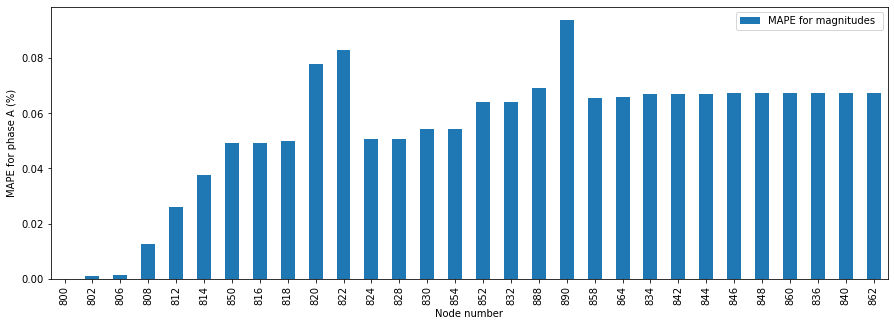

In [221]:
mag_error_phase_A = mag_MAPE_phase_A
df = pd.DataFrame({'MAPE ccc ': mag_error_phase_A }, index=node_number_phase_A)

df.plot(kind='bar',figsize=(15,5), xlabel=('Node number'), ylabel=('MAPE for phase A (%)'))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

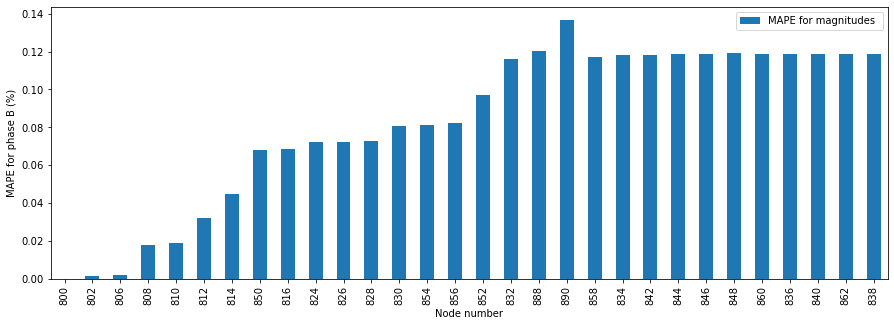

In [228]:
mag_error_phase_B = mag_MAPE_phase_B
df = pd.DataFrame({'MAPE for magnitudes ': mag_error_phase_B }, index=node_number_phase_B)

df.plot(kind='bar',figsize=(15,5), xlabel=('Node number'), ylabel=('MAPE for phase B (%)'))
plt.show()

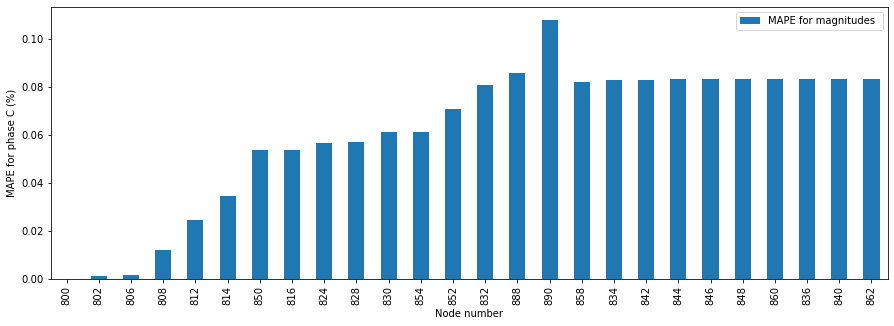

In [232]:
mag_error_phase_C = mag_MAPE_phase_C
df = pd.DataFrame({'MAPE for magnitudes ': mag_error_phase_C }, index=node_number_phase_C)

df.plot(kind='bar',figsize=(15,5), xlabel=('Node number'), ylabel=('MAPE for phase C (%)'))
plt.show()

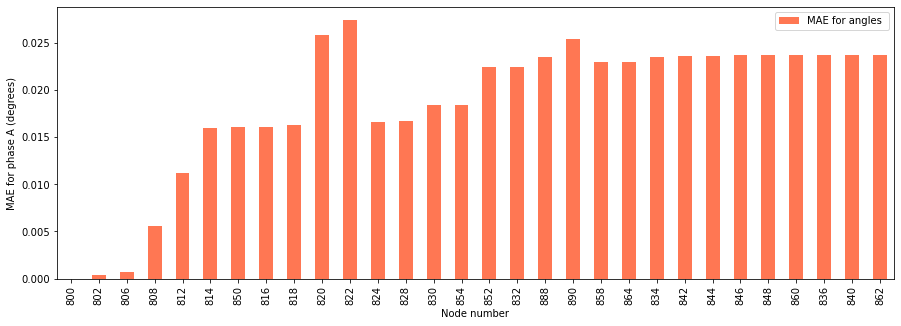

In [222]:
ang_error_phase_A = ang_MAE_phase_A
df = pd.DataFrame({'MAE for angles ': ang_error_phase_A }, index=node_number_phase_A)

df.plot(kind='bar',figsize=(15,5), color='#FF7753', xlabel=('Node number'), ylabel=('MAE for phase A (degrees)'))

plt.show()

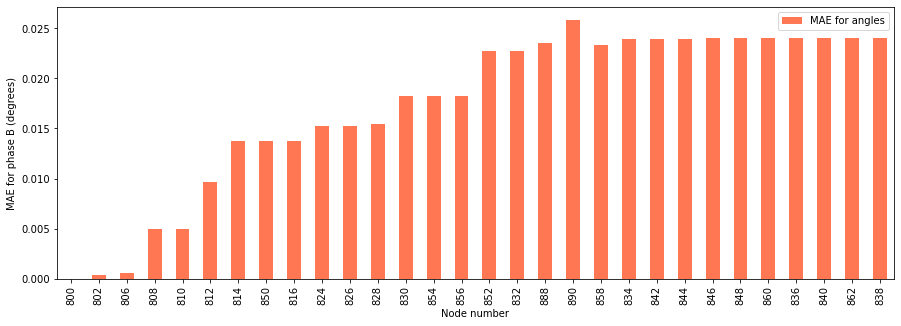

In [230]:
ang_error_phase_B = ang_MAE_phase_B
df = pd.DataFrame({'MAE for angles': ang_error_phase_B }, index=node_number_phase_B)

df.plot(kind='bar',figsize=(15,5), color='#FF7753', xlabel=('Node number'), ylabel=('MAE for phase B (degrees)'))
plt.show()

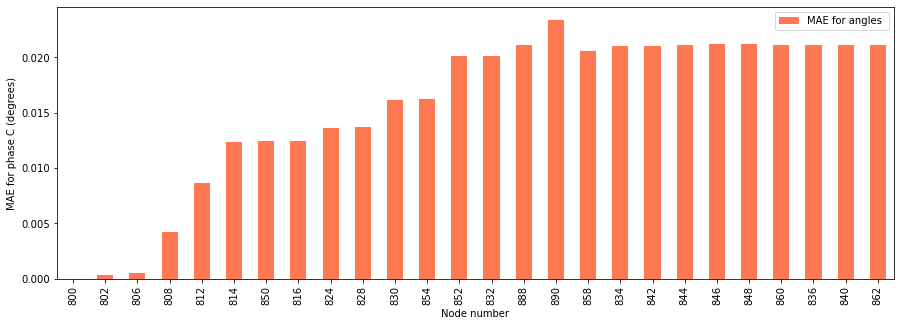

In [231]:
ang_error_phase_C = ang_MAE_phase_C
df = pd.DataFrame({'MAE for angles ': ang_error_phase_C }, index=node_number_phase_C)

df.plot(kind='bar',figsize=(15,5), color='#FF7753', xlabel=('Node number'), ylabel=('MAE for phase C (degrees)'))
plt.show()